# GEODOS data processing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [11]:
dto = '/storage/stations/Polednik/geodos/2021/08/10/210812'
dto = '/storage/stations/Polednik/geodos/2021/08/13/210720'
#dto = '/storage/stations/Polednik/geodos/2021/10/10'
#dto = '/storage/stations/Polednik/geodos/2021/10/13'
#dto = '/storage/stations/Polednik/geodos/2021/10/EC'
dto = '/storage/experiments/2021/11_geodos10_calibration'
#dto = '/storage/experiments/2021/05_GEODOS_kalibrace/GEO1'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_LS'
#dto = '/storage/experiments/2021/12_test_geodos1024/12k_Zn65_LS'
#dto = '/storage/experiments/2021/12_snih'
dto = '/storage/experiments/2021/12_K40/AIRDOSC_ABS'
dto = '/storage/experiments/2021/12_K40/AIRDOSC_LS_EM'
#dto = '/storage/experiments/2021/1226_GEODOS_BS'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_49_ABSjets'
#dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_45'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_BG_LS'
dto = '/storage/experiments/2021/1231_GEODOS_BS'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_13'
dto = '/storage/experiments/2022/0117_vanice/geodos/10'
dto = '/storage/experiments/2022/0120_vanice/geodos/45'
#dto = '/storage/experiments/2022/0120_vanice/geodos/10'
dto = '/storage/experiments/2022/0120_vanice/geodos/45'
dto = '/storage/experiments/2022/0407_bourka_exit45/geodos'
dto = '/storage/experiments/2022/0421_Geodosy_kalibrace/10_D16x30'
#dto = '/storage/experiments/2022/0421_Geodosy_kalibrace/B2_D16x30'
dto = '/storage/experiments/2022/0424_bourka_trebon/geodos'
dto = '/storage/stations/Milesovka/GEODOS/2022/10'
#dto = '/storage/stations/Polednik/geodos/2022/06/EC_vez'
#dto = '/storage/experiments/2022/0714_bourka_horovice_CAR1/geodos'
#dto = '/storage/stations/Polednik/geodos/2022/07/chlum'
#dto = '/storage/stations/Polednik/geodos/2022/07/svakov'
#dto = '/storage/stations/Polednik/geodos/2022/07/b2'

fto = dto + '/DATALOG.TXT'

l=[]
l.extend(range(0,1034))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS',3]
fw = df.loc[df[0]=='$AIRDOS',2]
last = df.loc[df[0]=='$AIRDOS'].index
print ('s.n.: ',sn[0])
print ('f.v.: ',fw[0])
print(df.loc[df[0]=='$AIRDOS',1])
print(len(df))
print(last[-1:][0])

# keep only last run
#df.drop(df.index[:last[-1:][0]], inplace=True) 

s.n.:  1290c00806a200908013a000a00000dd
f.v.:  NaI(Tl)-D18x30
0         GEO_1024_v1
12077     GEO_1024_v1
29005     GEO_1024_v1
44407     GEO_1024_v1
60970     GEO_1024_v1
73034     GEO_1024_v1
89279     GEO_1024_v1
101276    GEO_1024_v1
117522    GEO_1024_v1
132650    GEO_1024_v1
148849    GEO_1024_v1
164702    GEO_1024_v1
181881    GEO_1024_v1
201321    GEO_1024_v1
213061    GEO_1024_v1
231552    GEO_1024_v1
248973    GEO_1024_v1
260920    GEO_1024_v1
278470    GEO_1024_v1
289898    GEO_1024_v1
301728    GEO_1024_v1
314076    GEO_1024_v1
329143    GEO_1024_v1
345393    GEO_1024_v1
360741    GEO_1024_v1
379170    GEO_1024_v1
396890    GEO_1024_v1
408214    GEO_1024_v1
429687    GEO_1024_v1
444696    GEO_1024_v1
Name: 1, dtype: object
456895
444696


In [8]:
#df = df.iloc[1:]
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,$AIRDOS,GEO_1024_v3,D16x30,1290c00806a200923813a000a00000ec,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GBGSV,1,1,00,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNGLL,NaN,NaN,NaN,NaN,NaN,V,N,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,NaN,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNVTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83511,$HITS,7,4695,32,5335,27,16184,30,16758,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83512,$HIST,25191,317107.61,96746.25,14.38,2.70,-27,5054,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83513,$HITS,7,14775,25,24362,25,25616,39,28155,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83514,$HIST,25192,317120.25,96744.50,14.44,2.70,-27,5079,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fill position and time (Galileo)

In [12]:
#df.drop(df.loc[(df[0]=='$GNRMC') & (df[2]=='V')].index, inplace=True)
df.loc[(df[0]=='$GNRMC'),'flag']=True
df.loc[(df[0]=='$HIST'),'flag']=False
df.flag = df.flag.fillna(method='ffill')
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',5])
#df.loc[(df[0]=='$TIME') & (df['flag']),'on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
#df['on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
df['on_miliseconds'] = pd.to_numeric(df.loc[(df[0]=='$TIME') & (df['flag']),1]) * 1000
df['miliseconds'] = pd.to_numeric(df.loc[df[0]=='$HIST',2]) * 1000
df['gps_time'] = df.loc[df[0]=='$GNRMC',1]
df['gps_date'] = df.loc[df[0]=='$GNRMC',9]
df['alt'] = df.loc[df[0]=='$GNGGA',9]
df.loc[(df[0]=='$GNRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GNRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
#df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f',errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.index
#df['meas'] = df.loc[df[0]=='$HIST',1]
df.loc[df[0]=='$HITS','meas'] = np.nan
df = df.fillna(method='ffill')
df.meas = df.meas.astype(int)
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GNRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['miliseconds'], unit='ms') - pd.to_timedelta(df['on_miliseconds'], unit='ms')
#df.drop('date', axis=1, inplace=True)
#df.drop('miliseconds', axis=1, inplace=True)
#df.drop('on_miliseconds', axis=1, inplace=True)
df.iloc[-10:]

,0,1,2,3,4,5,6,7,8,9,...,1033,flag,on_miliseconds,miliseconds,alt,lat,lon,date,meas,UTC
459096,$HIST,6979,88263.10,92718.75,24.81,3.30,-43,857,857,0,...,NaN,False,87519830.0,88263100.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459096,2022-10-07 12:46:10.270
459097,$HITS,8,29156,37,29615,55,34507,46,37227,45,...,NaN,False,87519830.0,88263100.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459096,2022-10-07 12:46:10.270
459098,$HIST,6980,88275.45,92720.25,24.81,3.30,-43,857,857,0,...,NaN,False,87519830.0,88275450.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459098,2022-10-07 12:46:22.620
459099,$HITS,10,1891,33,14524,34,23000,29,25973,236,...,NaN,False,87519830.0,88275450.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459098,2022-10-07 12:46:22.620
459100,$HIST,6981,88287.79,92724.75,24.81,3.30,-43,857,857,0,...,NaN,False,87519830.0,88287790.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459100,2022-10-07 12:46:34.960
459101,$HITS,9,11463,81,18354,47,43415,70,52206,36,...,NaN,False,87519830.0,88287790.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459100,2022-10-07 12:46:34.960
459102,$HIST,6982,88300.15,92719.00,24.81,3.30,-43,857,857,0,...,NaN,False,87519830.0,88300150.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459102,2022-10-07 12:46:47.320
459103,$HITS,16,3606,51,5040,86,5166,227,7450,38,...,NaN,False,87519830.0,88300150.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459102,2022-10-07 12:46:47.320
459104,$HIST,6983,88312.51,92722.50,24.81,3.30,-43,857,857,0,...,NaN,False,87519830.0,88312510.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459104,2022-10-07 12:46:59.680
459105,$HITS,13,16022,30,20398,31,25179,70,33109,27,...,NaN,False,87519830.0,88312510.0,851.6,50.55522,13.931035,2022-10-07 12:33:47,459104,2022-10-07 12:46:59.680


In [13]:
df = df.loc[df['UTC']<'2022-06-25'].loc[df['UTC']>'2022-06-23']

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,1033,flag,on_miliseconds,miliseconds,alt,lat,lon,date,meas,UTC
73044,$GNVTG,070648.00,V,04,05,070647.00,V,N,08,N,...,NaN,True,69213990.0,73165420.0,824.5,50.555156,13.931001,2022-06-24 07:06:48,73044,2022-06-24 08:12:39.430
73045,$GNGGA,070648.00,V,04,05,070647.00,0,03,6.15,N,...,NaN,True,69213990.0,73165420.0,824.5,50.555156,13.931001,2022-06-24 07:06:48,73045,2022-06-24 08:12:39.430
73046,$GNGSA,A,1,29,31,11,0,03,6.15,N,...,NaN,True,69213990.0,73165420.0,824.5,50.555156,13.931001,2022-06-24 07:06:48,73046,2022-06-24 08:12:39.430
73047,$GNGSA,A,1,29,31,11,0,03,6.15,N,...,NaN,True,69213990.0,73165420.0,824.5,50.555156,13.931001,2022-06-24 07:06:48,73047,2022-06-24 08:12:39.430
73048,$GNGSA,A,1,29,31,11,0,03,6.15,N,...,NaN,True,69213990.0,73165420.0,824.5,50.555156,13.931001,2022-06-24 07:06:48,73048,2022-06-24 08:12:39.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83059,$HITS,7,2043,36,4420,138,15830,25,29612,47,...,NaN,False,60660760.0,60810650.0,834.6,50.555200,13.930708,2022-06-24 23:57:02,83058,2022-06-24 23:59:31.890
83060,$HIST,4856,60823.9,91391.25,13.31,3.50,-41,288,880,0,...,NaN,False,60660760.0,60823900.0,834.6,50.555200,13.930708,2022-06-24 23:57:02,83060,2022-06-24 23:59:45.140
83061,$HITS,22,1591,34,3720,30,5639,30,12079,50,...,NaN,False,60660760.0,60823900.0,834.6,50.555200,13.930708,2022-06-24 23:57:02,83060,2022-06-24 23:59:45.140
83062,$HIST,4857,60835.55,91391.00,13.38,3.50,-41,288,880,0,...,NaN,False,60660760.0,60835550.0,834.6,50.555200,13.930708,2022-06-24 23:57:02,83062,2022-06-24 23:59:56.790


## Add individual events to histogram

In [14]:
#HISTHITS = 25 # LS
HISTHITS = 24
#HISTHITS = 28 # ABSjets
FIRSTCH = 4

df.dropna(subset=['UTC'], inplace=True)
hist = df.loc[df[0]=='$HIST'].iloc[:,:10+HISTHITS].copy()
hist.iloc[:,1:] = hist.iloc[:,1:].apply(pd.to_numeric) #,errors='coerce')
#hist[0] = df[0]
hist['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
hist['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
hist['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
hist['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
hist['UTC'] = df['UTC']
#hist.iloc[:,18:269] = 0
hist.set_index('meas', inplace=True)

hits = df.loc[df[0]=='$HITS'].copy()
#hits['meas'] = hist.index
hits.iloc[:,1:] = hits.iloc[:,1:].apply(pd.to_numeric)
hits['UTC'] = df['UTC']
hits.set_index('meas', inplace=True)


In [81]:
hits = df.loc[df[0]=='$HITS'].copy()

In [15]:
hits.loc[hits[1]>500,1]=500
hits.loc[:,[*map('h{:04}'.format, range(1050))]] = 0
try:
    for i in range(len(hits)):
        for j in range(hits.iloc[i,1]):
            hits.iloc[i,int(1042+hits.iloc[i,j*2+3])] +=1
except:
    print(i,j)
    raise
            
histogram = pd.DataFrame()
histogram = hist.iloc[:,10+FIRSTCH:10+HISTHITS]
histogram = histogram.join(hits.iloc[:,1043+HISTHITS:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram['UTC'] = hist['UTC']

histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:1024],range(0,1024))})
#histogram.to_csv(dto + '/histogram.csv')
histogram[:5]

/tmp/ipykernel_6301/1475535954.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  histogram['temperature'] = hist[4]
/tmp/ipykernel_6301/1475535954.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  histogram['pressure'] = hist[3]
/tmp/ipykernel_6301/1475535954.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

,0,1,2,3,4,5,6,7,8,9,...,h1045,h1046,h1047,h1048,h1049,temperature,pressure,voltage,current,UTC
meas,,,,,,,,,,,,,,,,,,,,,
73056,3,1,2,0,0,2,1,0,1,3,...,0,0,0,0,0,24.81,91679.50,3.63,-17,2022-06-24 07:06:59.730
73058,1,0,3,2,2,0,2,3,1,2,...,0,0,0,0,0,24.81,91682.75,3.63,8,2022-06-24 07:07:12.320
73060,1,0,2,4,1,2,1,1,2,0,...,0,0,0,0,0,24.88,91684.25,3.63,18,2022-06-24 07:07:24.990
73062,2,0,4,3,0,0,1,0,1,2,...,0,0,0,0,0,24.88,91683.25,3.63,23,2022-06-24 07:07:37.240
73064,0,0,0,2,0,2,1,1,1,1,...,0,0,0,0,0,24.94,91685.50,3.63,25,2022-06-24 07:07:49.840


In [25]:
hits.iloc[:,1042:]
histogram.iloc[:,18:]

,18,19,20,21,22,23,24,25,26,27,...,h1045,h1046,h1047,h1048,h1049,temperature,pressure,voltage,current,UTC
meas,,,,,,,,,,,,,,,,,,,,,
735,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.56,96482.50,2.39,-108,2022-10-02 20:04:58.600
737,1.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,9.63,96492.25,2.39,-62,2022-10-02 20:05:11.130
739,1.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.56,96484.00,2.39,-45,2022-10-02 20:05:23.680
741,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.56,96486.00,2.39,-36,2022-10-02 20:05:36.220
743,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.56,96486.25,2.39,-33,2022-10-02 20:05:48.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83506,0.0,38.0,69587.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,14.31,96748.00,2.70,-27,2022-10-08 16:42:54.740
83508,0.0,38.0,69587.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.38,96750.50,2.70,-27,2022-10-08 16:43:07.390
83510,0.0,38.0,69587.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,14.38,96748.25,2.70,-27,2022-10-08 16:43:20.030


In [6]:
histogram.to_csv(dto + '/histogram.csv')

## Plot Flux

/tmp/ipykernel_6301/1653071643.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_6301/1653071643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


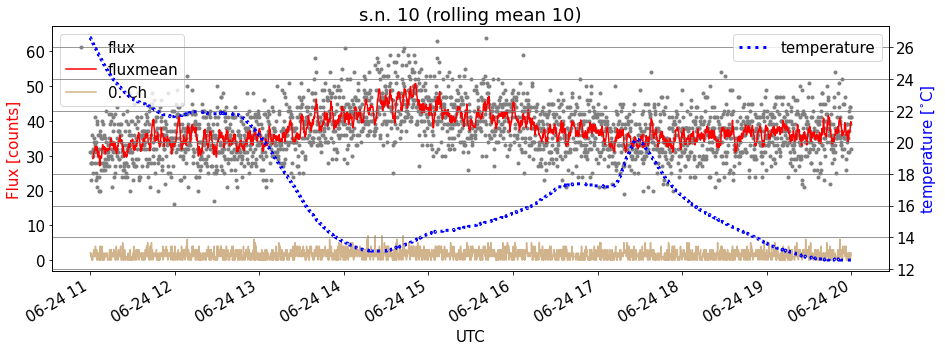

In [19]:
NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']
xx = xx.loc['2022-06-24 11:00:00':'2022-06-24 20:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_32429/1247258885.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_32429/1247258885.py:49: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


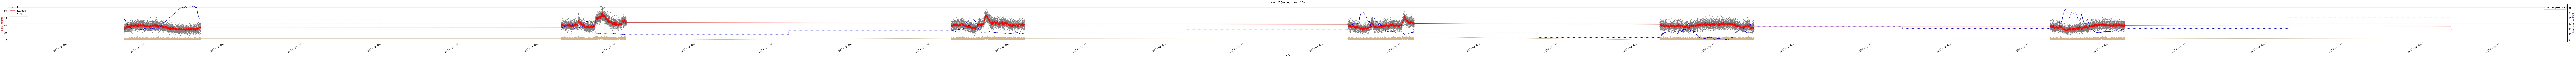

In [7]:
import matplotlib.dates as mdates

NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(300,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-5-19 00:00:00':'2022-5-21 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y - %d. %m.'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()

plt.savefig(dto + '/flux.png')


/tmp/ipykernel_4634/1363537573.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_4634/1363537573.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


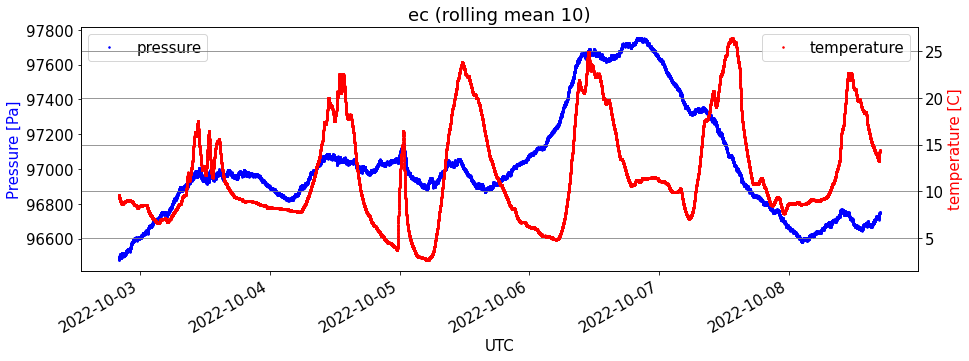

In [8]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']



xx['pressure'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'pressure')

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Pressure [Pa]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('temperature [C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_32429/3841045809.py:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_32429/3841045809.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


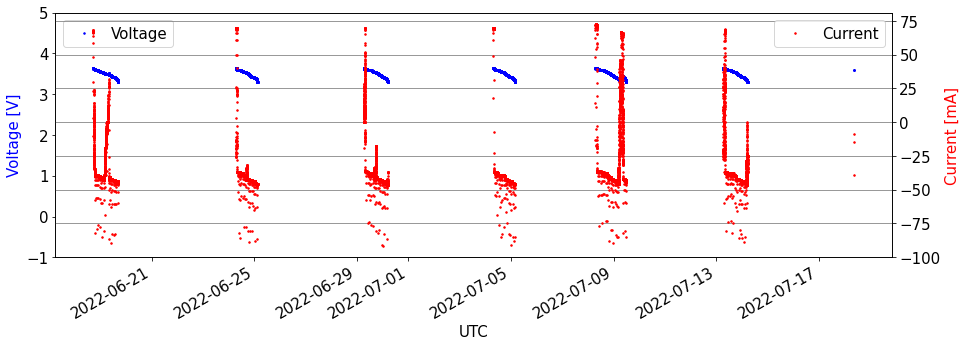

In [9]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 00:00:00':'2021-08-16 00:00:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']



xx['voltage'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'Voltage')

s = fto.split('/')
#plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([-1,5])
plt.xlabel('UTC')
plt.ylabel(r'Voltage [V]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['current'].plot(c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('Current [mA]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



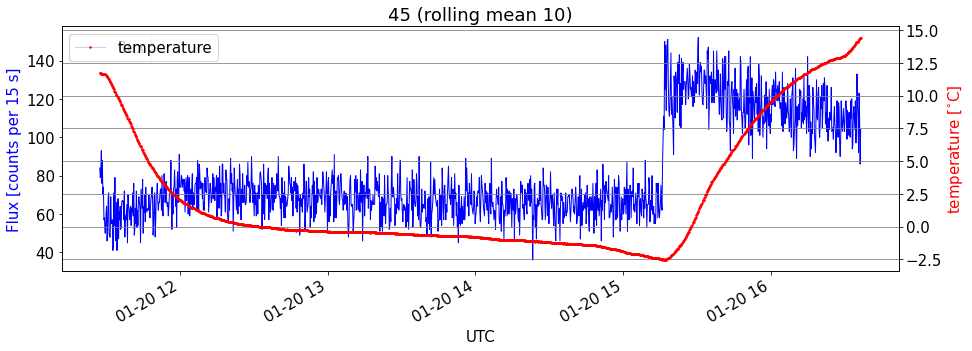

In [13]:
NOISE_LEVEL = 0
LAST_CHANNEL = 240
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

#xx['flux'].plot(c='gray', marker='.', linewidth=1)
xx['flux'].plot(c='blue', linewidth=1)
#xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts per 15 s]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Blitzortung

In [94]:
lat=49.0640992 # Polednik
lon=13.3950208

lat=49.0078642 # Trebon
lon=14.7379117

start=pd.Timestamp('2022-04-24 16:00')
end=pd.Timestamp('2022-04-24 19:00')

BLITZ_DIST = 60

print(start, end, lat, lon)
region=1

### url for json data preparation
url=[]

for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))

import requests
blitz=pd.DataFrame()
for i in range(len(url)):
    try:
        html = requests.get(url[i]).content
        blitz_part = pd.read_json(html,lines=True)
        #blitz_part.drop(columns=['status','sig'], inplace=True)#,'region', 
        blitz=blitz.append(blitz_part)
    except:
        print("No data", url[i])
        pass
blitz.set_index(['time'], inplace=True)

### reduction of too distant events
blitz=blitz[(blitz['lat']>(lat-2) )&(blitz['lat']<(lat+2) )]
blitz=blitz[(blitz['lon']>(lon-3.5) )&(blitz['lon']<(lon+3.5) )]

### calculation of distance of events from station
#from math import radians, cos, sin, asin, sqrt, atan2, degrees
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
    pass
#blitz['time']=blitz.index    
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
blitz.reset_index(inplace=True)
blitz.set_index('date', inplace=True)

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz.drop(columns=['lonRad','latRad','DlonRad','DlatRad','a'], inplace=True)
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
blitz = blitz.loc[blitz['km'] < BLITZ_DIST]
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
#blitz.reset_index(inplace=True)
#blitz.set_index('date', inplace=True)

blitz.to_csv(dto + "/blitz.csv")

print('end')

2022-04-24 16:00:00 2022-04-24 19:00:00 49.0078642 14.7379117
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/00.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/10.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/20.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/30.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/40.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/16/50.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/17/00.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/17/10.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/17/20.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/17/30.json
No data http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/04/24/17/40.json
No data http:/

KeyError: "None of ['time'] are in the columns"

b'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx/1.18.0 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'

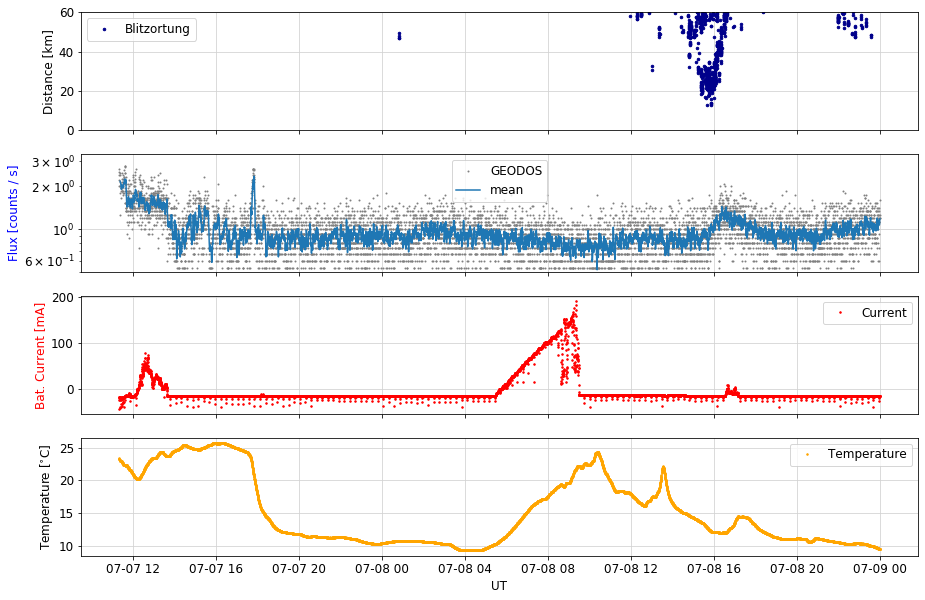

In [52]:
WINDOW = 10

FROM = '2021-07-07 00:00:00'
TO = '2021-07-09 00:00:00'

blitz = pd.read_csv(dto + "/blitz.csv")
blitz['date'] = pd.to_datetime(blitz['date'])
blitz.set_index('date', inplace=True)

fig, (ax6, ax3, ax5, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12})

xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']
xx = xx.loc[FROM:TO]

blitzblitz = blitz.loc[FROM:TO]

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

ax3.plot(xx['flux']/15, marker='.', color='gray', label='GEODOS', ms=2, linestyle='none')
ax3.plot(xx['fluxmean']/15, label='mean')
ax3.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax3.set_ylabel(r'Flux [counts / s]', color='blue')
ax3.set_yscale('log')
ax3.set_ylim(0.5,)
ax3.legend()

ax4.plot(xx['temperature'], c='orange', label='Temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax4.set_xlabel('UT')
ax4.set_ylabel(r'Temperature [$^{\circ}$C]')
ax4.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax4.legend()

ax6.plot(blitzblitz.index, blitzblitz.km, ls='', marker='.', ms=5, label='Blitzortung', c='darkblue')
ax6.set_ylabel('Distance [km]')
ax6.legend()
ax6.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax6.set_ylim(0,60)

ax5.plot(xx['current'], c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax5.set_ylabel('Bat. Current [mA]', color='red')
ax5.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax5.legend()


# Energy Spectrum

(0.0, 260.0)

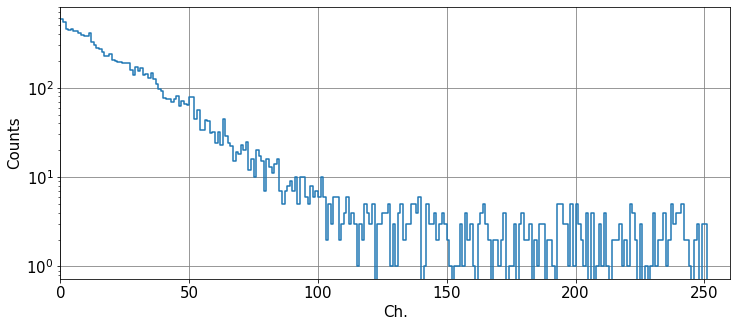

In [20]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#yy = yy.loc['2021-07-08 17:00:00':'2021-07-08 18:00:00']
#yy = yy.loc['2022-1-17 17:39:00':'2022-1-17 17:45:00']
#yy = yy.loc['2022-4-21 16:00:00':'2022-4-22 02:00:00']

#yy = yy.loc['2021-05-12 11:20:00':'2021-05-12 11:30:00']
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']
yy = yy.loc['2022-06-24 14:00:00':'2022-06-24 15:00:00']


#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,260])
#plt.ylim([0,2e4])

(0.0, 4.0)

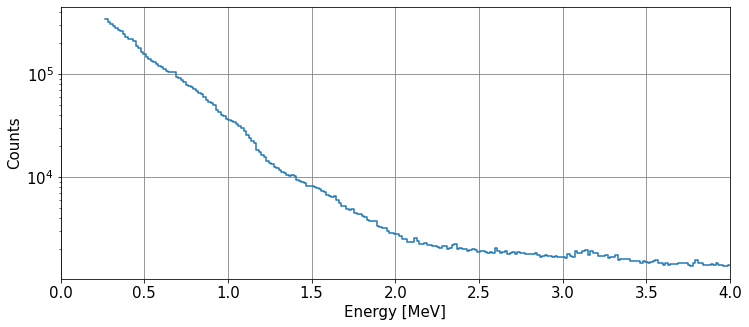

In [21]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#yy = yy.loc['2021-07-08 17:00:00':'2021-07-08 18:00:00']

#yy = yy.loc['2022-1-17 17:35:00':'2022-1-17 17:45:00']

#yy = yy.loc['2021-05-12 11:20:00':'2021-05-12 11:30:00']
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
ener['ener'] = 0.015 * ener.index + 0.268 

plt.figure(figsize=(12,5))
plt.plot(ener['ener'], ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,4])
#plt.ylim([0,250])

In [17]:
ener['ener'] = 0.015 * ener.index + 0.268 


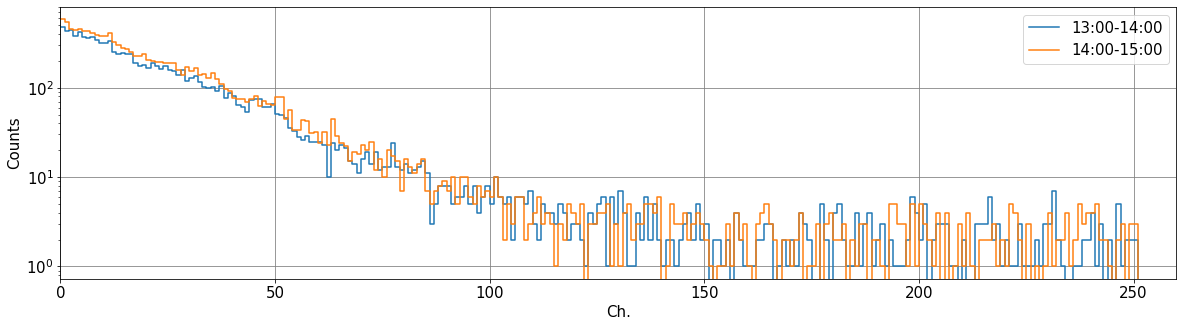

In [26]:
plt.figure(figsize=(20,5))
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
plt.grid(color='grey')
plt.xlim([0,260])
#plt.ylim([0,2e4])

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

zz = yy.loc['2022-06-24 13:00:00':'2022-06-24 14:00:00']
ener = zz.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='13:00-14:00')

zz = yy.loc['2022-06-24 14:00:00':'2022-06-24 15:0:00']
ener = zz.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='14:00-15:00')

zz = yy.loc['2022-06-24 14:20:00':'2022-06-24 14:30:00']
ener = zz.iloc[:,0:1024].sum()
ener = ener.reset_index()
#plt.plot(ener[0], drawstyle='steps-post', label='14:20')

plt.legend()


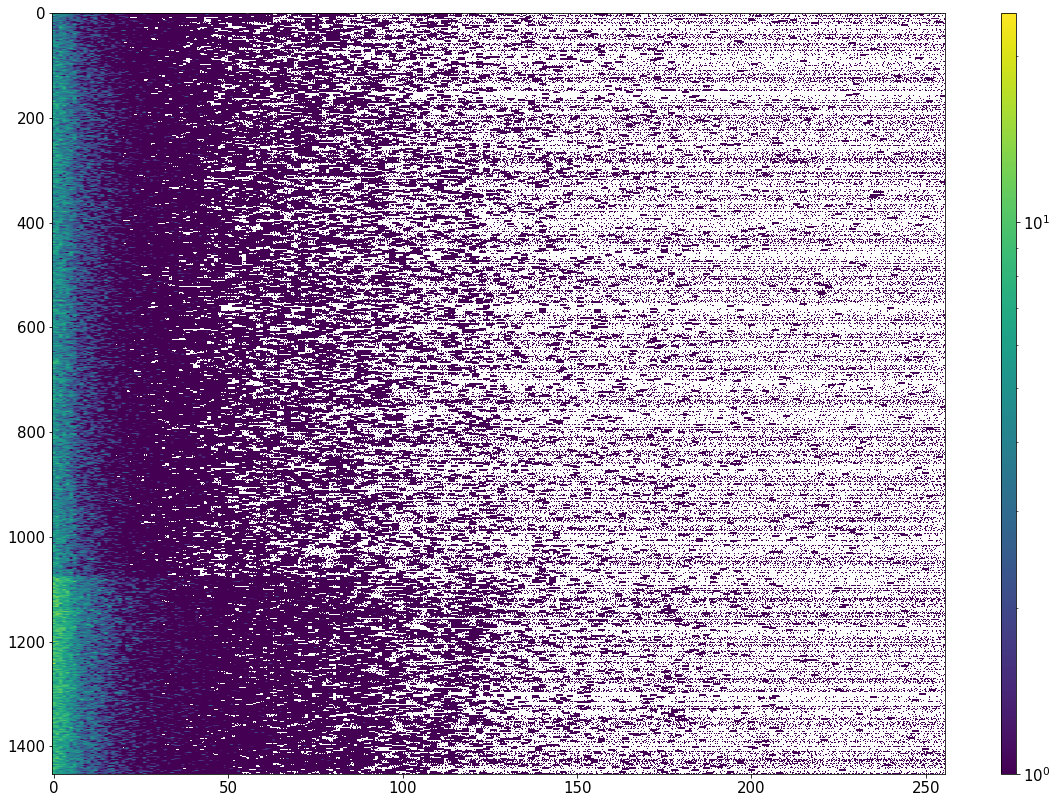

In [18]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(20, 14))
plt.imshow((histogram.iloc[:,0:256]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
None

(0.0, 30.0)

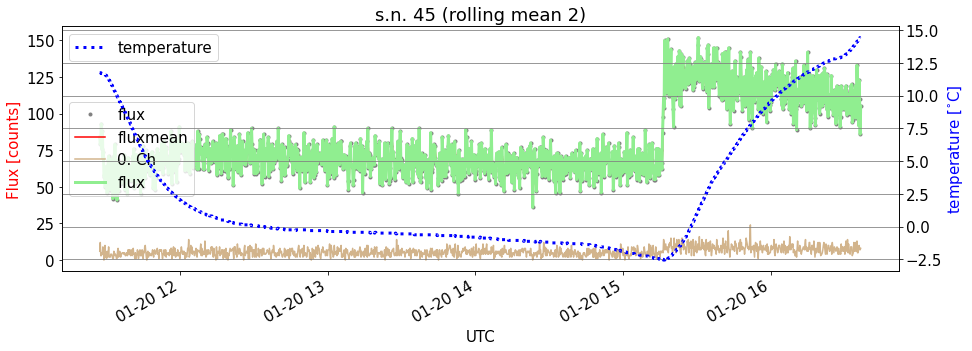

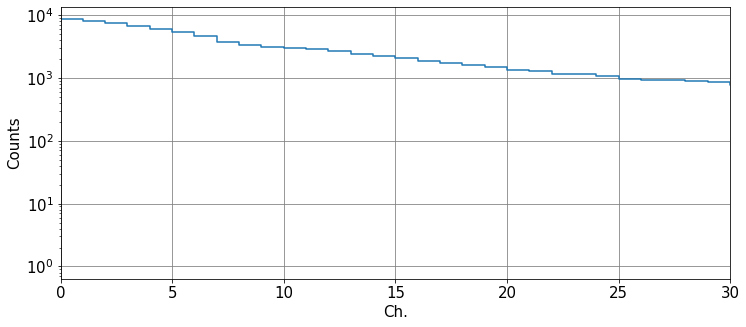

In [20]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 2

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2021-05-12 8:35:00':'2021-05-12 16:00:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
#yy = xx.loc['2021-05-12 11:05:00':'2021-05-12 11:30:00']
#yy = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
yy = xx

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)
yy['flux'].plot(c='lightgreen', linewidth='3')

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:240].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,30])

In [21]:
l = np.array([[1, 1],[5,1]]) # Calibration
r = np.array([0.511, 1.275])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])
255  * coef[0] + coef[1]

0.19099999999999998 0.32


49.02499999999999

In [47]:
raise # nedodelano

hits.loc[hits[1]>500,1]=500
hits.loc[:,[*map('h{:04}'.format, range(1050))]] = 0
            
nchannels = 1024

try:
    for i in range(len(hits)):
        nevents = hits.iloc[i,1]
        events_chan = hits.iloc[i,3::2][:nevents]
        hits.iloc[i,1042:1042+nchannels] = np.bincount(events_chan, minlength=nchannels)
except:
    print(i)
    raise
    
histogram = pd.DataFrame()
histogram = hist.iloc[:,10+FIRSTCH:10+HISTHITS]
histogram = histogram.join(hits.iloc[:,1042+HISTHITS:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram['UTC'] = hist['UTC']
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:1024],range(0,1024))})
#histogram.to_csv(dto + '/histogram.csv')
histogram

RuntimeError: No active exception to reraise

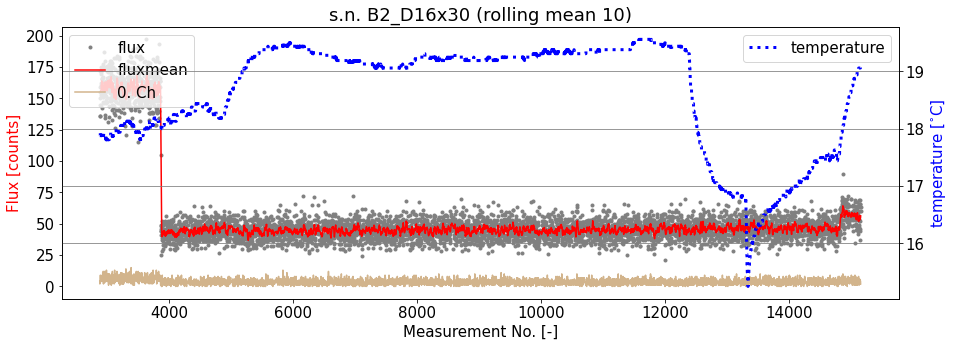

In [32]:
NOISE_LEVEL = 0
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
#xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('Measurement No. [-]')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



/tmp/ipykernel_25698/992775256.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,2e4])
/tmp/ipykernel_25698/992775256.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,2e4])


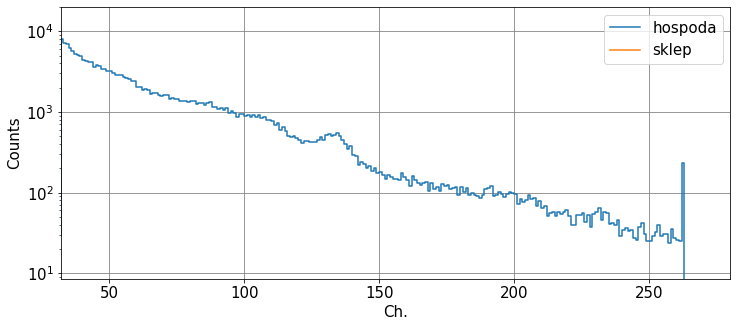

In [9]:
plt.figure(figsize=(12,5))

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']

ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='hospoda')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([32,280])
plt.ylim([0,2e4])

yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

yy = yy.loc['2022-07-17 20:00:00':'2022-07-18 22:50:00']

ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.plot(ener[0], drawstyle='steps-post', label='sklep')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([32,280])
plt.ylim([0,2e4])

plt.legend()

/tmp/ipykernel_8871/4012391210.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-')
/tmp/ipykernel_8871/4012391210.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='grey', linestyle='-')


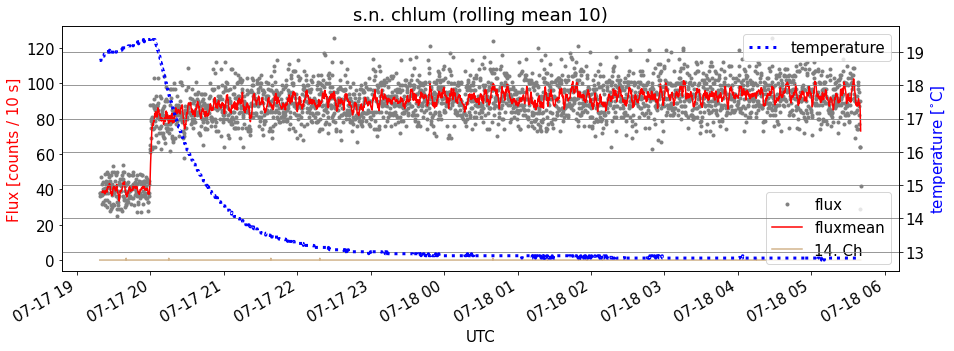

In [25]:
NOISE_LEVEL = 14
LAST_CHANNEL = 1023
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
#xx = xx.loc['2022-4-25 00:00:00':'2022-4-25 8:00:00']
#xx = xx.loc['2022-1-16 00:00:00':'2022-1-21 00:00:00']
#xx = xx.loc['2021-11-17 00:00:00':'2021-11-18 00:00:00']
#xx = xx.loc['2022-07-17 00:00:00':'2022-07-17 19:50:00']
#xx = xx.loc['2022-07-17 20:00:00':'2022-07-17 23:50:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts / 10 s]', color='red')
plt.legend(loc=4)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-post')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Events

In [29]:
# vynulovani cisel, ktere tam da zahadne parser
hits = df.loc[df[0]=='$HITS'].copy()
hits.reset_index(inplace=True, drop=True)
hits = hits.fillna(0).copy()
hits.loc[:,1:520] = hits.loc[:,1:520].astype(int) 

for index, row in hits.iterrows():
    start_index = row[1]*2+2
    columns_to_zero = hits.columns[start_index:500]
    hits.loc[index, columns_to_zero] = np.zeros_like(hits.loc[index, columns_to_zero])


In [38]:
hits['time'] = hits['UTC']
events = hits.iloc[:,3::2].fillna(0).copy()
events_time = hits.iloc[:,2::2].fillna(0).copy()

events.reset_index(inplace=True, drop=True)
events.columns = list(range(events.shape[1]))
events_time.reset_index(inplace=True, drop=True)
events_time.columns = list(range(events_time.shape[1]))


In [53]:
# Převod hodnoty ve sloupci "Start" na datetime
events_time['Start'] = pd.to_datetime(events_time.iloc[:,-1])

# Nahrazení hodnot ve sloupcích 1 až 10 absolutním časem
for column in hits.columns[0:500]:
    events_time[column] = events_time['Start'] + pd.to_timedelta(events_time[column], unit='us')

In [63]:
last_column = events_time.iloc[:, -1].astype(int) 
evtime = events_time.iloc[:,:500] * 10**5 # to ns

nula = pd.to_datetime('1970-01-01 00:00:00').value

added_values =  evtime - nula #+ 100*65535*10**3  

added_values = added_values + last_column 


evt = added_values.astype('datetime64[ns]')



In [57]:
ev = events.iloc[:,:500].values.flatten()
evtt = events_time.iloc[:,:500].values.flatten()

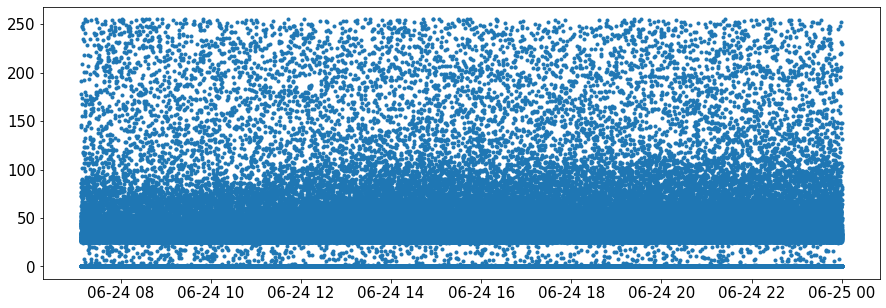

In [58]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

plt.scatter(evtt, ev, marker='.')
#plt.ylim(0,250)
#plt.xlim('2022-06-24 11:00:00','2022-06-24 20:00:00')

In [312]:
timedelta_to_add = pd.to_timedelta(56535 * 100, unit='us')
last_column_datetime = pd.to_datetime(last_column)


In [ ]:
events = pd.DataFrame(columns=['time', 'energy'])


try:
    for i in range(len(hits)):
        for j in range(hits.iloc[i,1]):
            event_ch = hits.iloc[i,j*2+3]
            event_time = hits.iloc[i,j*2+2]
            #etime = hist.iloc[i].UTC - pd.Timedelta(microseconds=64*(65535*4-event_time))
            etime = hits.iloc[i].UTC - pd.Timedelta(microseconds=54*65535*4) + pd.Timedelta(microseconds=53*event_time)
            events = pd.concat([events, pd.DataFrame.from_records([{'time':etime, 'energy':event_ch}])])

except:
    print(i,j)
    raise
            
events.set_index('time', drop=False, inplace=True)
events.sort_index(inplace=True)




START_HIST = 12 # Sloupec prvniho kanalu HIST
FIRST_CH = 17  # Sloupec prvniho kanalu bez sumu
LAST_CH = 36+1 # Sloupec posledni kanalu HIST

MAX_CH = 1024

histogram = pd.DataFrame(np.zeros((len(hist), MAX_CH)))
hist.reset_index(drop=True,inplace=True)
histogram.iloc[:,0:LAST_CH-FIRST_CH] = hist.iloc[:,0:LAST_CH-FIRST_CH]

channels_columns = hits.iloc[:, 4::2].fillna(0).astype(int)

row_indices = np.arange(len(hits))
column_indices = channels_columns.values.flatten()

combined_indices = np.repeat(row_indices, len(column_indices)//hits.shape[0]) * MAX_CH + column_indices
histogram_values = np.bincount(combined_indices, minlength=hits.shape[0] * MAX_CH)#hits.shape[0] * channels_columns.shape[1])
histogram_values = histogram_values.reshape(hits.shape[0], MAX_CH)

histogram.iloc[:,(LAST_CH-FIRST_CH):(LAST_CH-FIRST_CH)+MAX_CH-(LAST_CH-START_HIST)] = histogram_values[:,(LAST_CH-START_HIST):]

histogram['temperature'] = hist['temperature'].apply(pd.to_numeric)
histogram['pressure'] = hist['pressure'].apply(pd.to_numeric)
histogram['voltage'] = hist['voltage'].apply(pd.to_numeric)
histogram['current'] = hist['current'].apply(pd.to_numeric)

histogram['time'] = hist['time']
histogram.set_index('time', drop=False, inplace=True);


In [ ]:
NOISE_LEVEL = 14
LAST_CHANNEL = 17
WINDOW = 20

xx = histogram
xx.set_index('UTC', inplace = True, drop=False)

FROM = '2022-06-24 14:10:00'
TO = '2022-06-24 14:20:00'

xx = xx.loc[FROM:TO].copy()
#blitz_x = blitz.loc[FROM:TO].copy()
events_x = events.loc[FROM:TO].copy()

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

#xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

fig, (ax6, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,8), facecolor='lightyellow')
ax5_twin = ax6.twinx()

ax5_twin.plot(xx['flux'], c='gray', linestyle='-', marker='.', label='GEODOS (≤ Ch. 8)', drawstyle='steps-pre')
#ax5_twin.plot(xx['flux'], c='gray', label='GEODOS')
#ax5_twin.plot(xx['fluxmean'], c='gray', label='Geodos avg')
ax5_twin.set_ylabel('Counts [-]', color='black')
#ax5.set_ylim(0,21)
ax5_twin.legend()
#ax5.set_yscale('log')
#ax5_twin.grid()
#ax5.set_xlabel('UTC')

'''
ax6.plot(blitz_x.date, blitz_x.km, ls='', marker='$🗲$', label='Blitzortung')
ax6.set_ylabel('Distance [km]', color='darkblue')
ax6.set_ylim(0,65)
ax6.grid()
#ax6.vlines(x=gps_x['timeR'], ymin=0, ymax=150, color='red', label='Trigger', lw=1, alpha=0.5)
ax6.legend(loc=9)
'''
#ax2.plot(events_x.loc[events_x.energy>0].energy, ls='', ms=10, marker='+', color='green', label='> Ch. 30')
ax2.plot(events_x.energy, ls='', ms=10, marker='o', color='green', label='GEODOS (> Ch. 8)', alpha=0.1)
ax2.set_ylabel('Channel [-]', color='green')
ax2.grid()
#ax2.set_ylim(7,40)
ax2.legend(loc=1)
ax2.set_xlabel('UTC')
ax2.tick_params(axis='x', labelrotation = 90)
